# Dobrenz Magnimind - Module 3 Lab 2 

1. Load the dataset bike_day_raw.csv, which has the regression target cnt. This dataset is hourly bike rentals in the citybike platform. The cnt column is the number of rentals, which we want to predict from date and weather data.

- Split the data into a training and a test set using train_test_split. 

- Use the LinearRegression class to learn a regression model on this data. 

- You can evaluate with the score method, which provides the R^2or using the mean_squared_error function from sklearn.metrics (Challenge: You can also write it yourself in numpy).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('bike_day_raw.csv')

In [3]:
df.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


## Split the Data into Training and Test Splits

In [4]:
y = df['cnt']
X = df.drop(columns='cnt')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
X_train.shape

(548, 10)

In [7]:
X_test.shape

(183, 10)

In [8]:
y_train.shape

(548,)

In [9]:
y_test.shape

(183,)

## Linear Regression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train);

In [12]:
np.mean(cross_val_score(lr, X_train, y_train, cv=10))

0.4679015493600523

## Ridge Regression

In [13]:
rr = Ridge()

In [14]:
rr.fit(X_train, y_train);

In [15]:
np.mean(cross_val_score(rr, X_train, y_train, cv=10))

0.4892761684715959

In [16]:
# Ridge using GridSearch

In [17]:
# define grid of alpha values

alpha_values = {'alpha':np.logspace(-4,4,50)}

In [18]:
grid_search = GridSearchCV(estimator=rr, param_grid=alpha_values, cv=10)

In [19]:
grid_search.fit(X_train, y_train);

In [20]:
# print the best parameters and the corresponding score

print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Best score: {grid_search.best_score_}")

Best alpha: 0.8286427728546842
Best score: 0.48925795394036886


## Lasso Regression

In [21]:
las = Lasso(max_iter=10000)

In [22]:
las.fit(X_train, y_train);

In [23]:
np.mean(cross_val_score(las, X_train, y_train, cv=10))

0.4852932445699637

In [24]:
# Lasso Using GridSearch

In [25]:
alpha_values = {'alpha': np.logspace(-4,10,50)}

In [26]:
grid_search = GridSearchCV(estimator=las, param_grid=alpha_values, cv=10)

In [27]:
grid_search.fit(X_train, y_train);

In [28]:
# print the best parameters and the corresponding score

print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Best score: {grid_search.best_score_}")

Best alpha: 1.0
Best score: 0.4852932445699637


# Diabetes Dataset

2. Load the diabetes dataset using sklearn.datasets.load_diabetes.
- Scale the dataset (you can be creative and make pipelines)
- Apply LinearRegression, 
- Apply Ridge and do grid search 
- Apply Lasso and do grid search
- Visualize the coefficients.


In [29]:
diabetes_data = load_diabetes()

In [30]:
X = diabetes_data.data
y = diabetes_data.target

In [31]:
df = pd.DataFrame(X, columns=diabetes_data.feature_names)

In [32]:
df['target'] = y

In [33]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [34]:
# create a separate DataFrame so we can extract the feature names for graphing the the coefficients

df2 = df.drop(columns='target')

## Train Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
X_train.shape

(331, 10)

In [37]:
X_test.shape

(111, 10)

In [38]:
y_train.shape

(331,)

In [39]:
y_test.shape

(111,)

## Scale the Dataset

In [40]:
scaler = StandardScaler()

In [41]:
scaler.fit(X_train);

In [42]:
X_train_scaled = scaler.transform(X_train)

In [43]:
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(X_train, y_train);

In [46]:
np.mean(cross_val_score(lr, X_train, y_train, cv=10))

0.46885326252302145

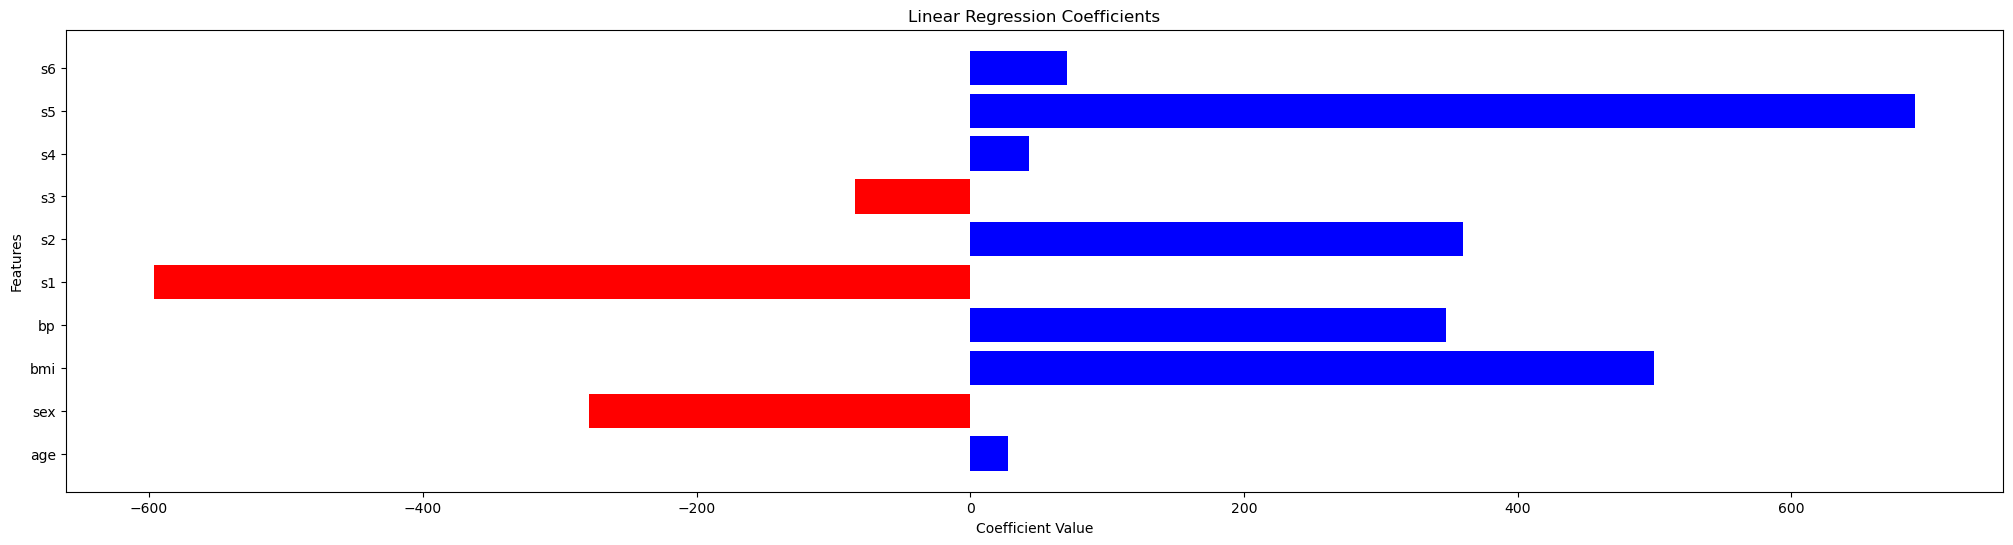

In [47]:
# extract coefficients

coefficients = lr.coef_

# get feature names

feature_names = df2.columns.tolist()

# create a DataFrame for plotting

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# plot the coefficients

# define colors: blue for positive coefficients, red for negative coefficients

colors = ['blue' if coef > 0 else 'red' for coef in coef_df['Coefficient']]

plt.figure(figsize=(25, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Linear Regression Coefficients')
plt.xticks()
plt.show()

## Ridge Regression

In [48]:
rr = Ridge()

In [49]:
alpha_values = {'alpha': np.logspace(-4,10,50)}

In [50]:
# create a GridSearch

grid_search = GridSearchCV(estimator=rr, param_grid=alpha_values, cv=10)

In [51]:
grid_search.fit(X_train_scaled, y_train);

In [52]:
# print the best parameters and the corresponding score

print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Best score: {grid_search.best_score_}")

Best alpha: 13.89495494373136
Best score: 0.4720329310311412


In [53]:
rr = Ridge(alpha = 0.5179474679231207)

In [54]:
rr.fit(X_train, y_train);

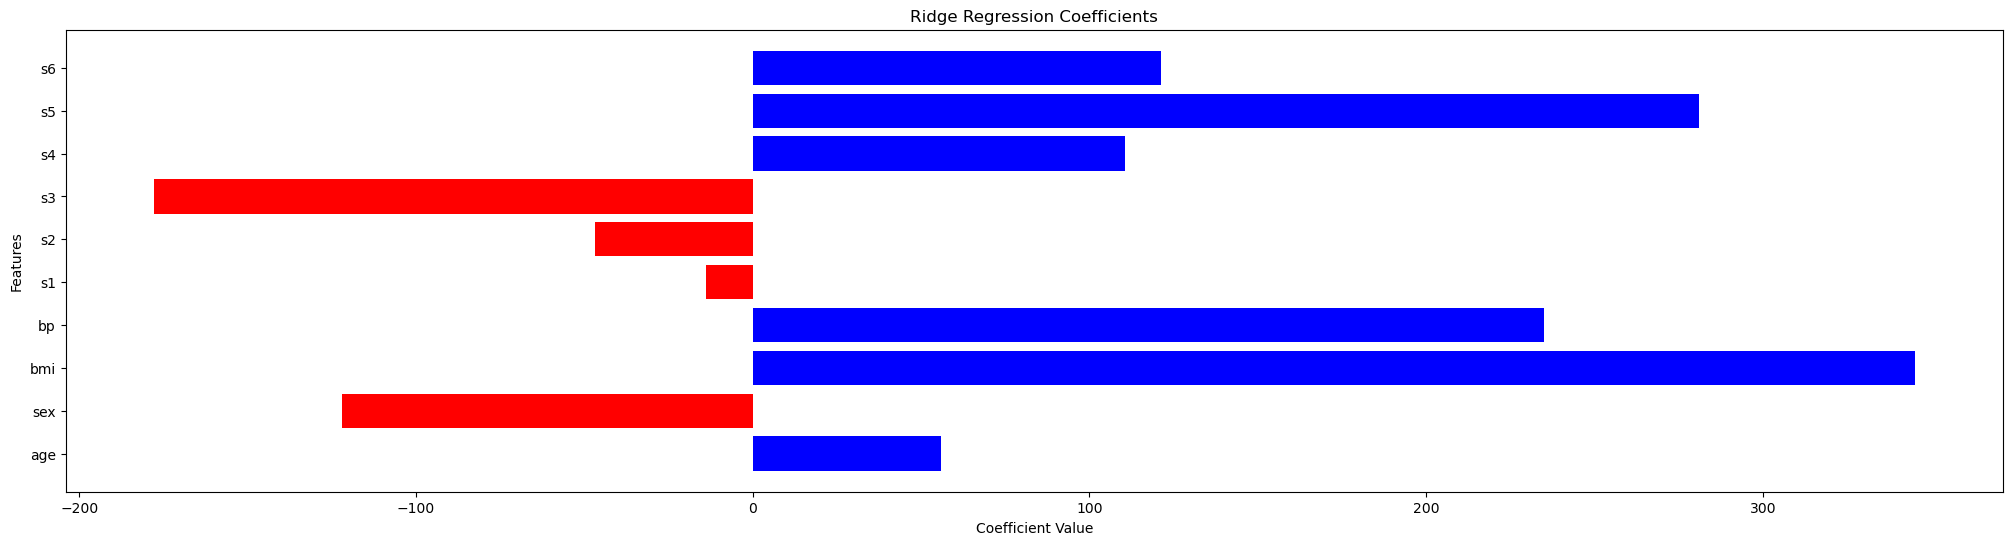

In [55]:
# extract coefficients

coefficients = rr.coef_

# get feature names

feature_names = df2.columns.tolist()

# create a DataFrame for plotting

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# plot the coefficients

# define colors: blue for positive coefficients, red for negative coefficients

colors = ['blue' if coef > 0 else 'red' for coef in coef_df['Coefficient']]

plt.figure(figsize=(25, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Ridge Regression Coefficients')
plt.xticks()
plt.show()

## Lasso Regression

In [56]:
las = Lasso()

In [57]:
alpha_values = {'alpha': np.logspace(-4,10,50)}

In [58]:
grid_search = GridSearchCV(estimator=las, param_grid=alpha_values, cv=10)

In [59]:
grid_search.fit(X_train_scaled, y_train);

In [60]:
# print the best parameters and the corresponding score

print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Best score: {grid_search.best_score_}")

Best alpha: 0.5179474679231207
Best score: 0.47291860729123003


In [61]:
las = Lasso(alpha=0.0001)

In [62]:
las.fit(X_train_scaled, y_train);

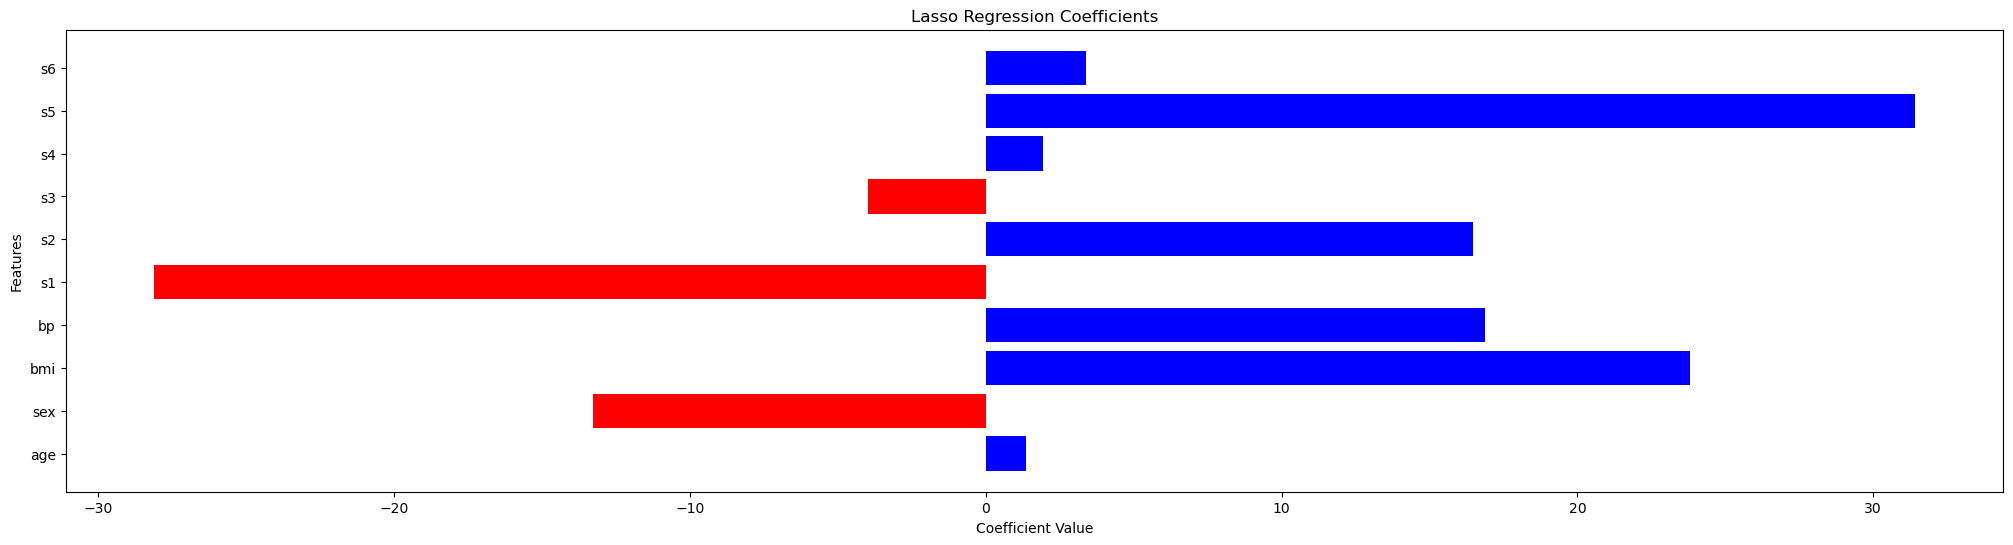

In [63]:
# extract coefficients

coefficients = las.coef_

# get feature names

feature_names = df2.columns.tolist()

# create a DataFrame for plotting

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# plot the coefficients

# define colors: blue for positive coefficients, red for negative coefficients

colors = ['blue' if coef > 0 else 'red' for coef in coef_df['Coefficient']]

plt.figure(figsize=(25, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Lasso Regression Coefficients')
plt.xticks()
plt.show()